# 

In [ ]:
# Make the sim cubes look like real cubes


In [11]:
# ran this in terminal: sudo apt-get install texlive-latex-base texlive-latex-extra texlive-fonts-recommended


[sudo] password for ben: 

In [34]:
import gc
import numpy as np
import matplotlib.pyplot as plt

import mplt_style
plt.style.use(mplt_style.style1)
import iMANGA_functions as iMANGA

from astropy.io import fits
from astropy.wcs import WCS # World coordinate system

from spectral_cube import SpectralCube    
from spectral_cube import LazyMask
import spectral_cube

import os

import copy


from astropy.io import fits
from pathlib import Path
from astropy.visualization import simple_norm

from matplotlib import rc#plt is broken
rc('text', usetex = False)



#rectangular cropping function
#%run "/media/ben/home/ben/Documents/Grad Stuff/MM data/Simplified/2025/0 Imports and functions.ipynb"
%run "0_Imports.ipynb"

%matplotlib inline
#!pip show matplotlib
# imports a function called Crop_Nans
# imports the noise function "Noise_Matching"

# Gaussian Correlated 2D noise is good enough for our purpose (see https://www.tng-project.org/data/docs/specifications/#sec5z)


In [ ]:



folder = Path("Sim_Cubes/")



    
for file in folder.glob("*.fits"):

    
    print(file)
    P  = SpectralCube.read(file)

    #reduce size

    Q = P[int(len(P)/2)-int(len(P)/10):int(len(P)/2)+int(len(P)/10)]

    #Use noise function defined in 0_Imports.ipynb
    #Use 1/20 of the max emission as a simple expectation noise 

    if np.nanmax(Q.hdu.data) == 0.0:
        continue

    #Uses pixel as beam size since there is no beam here
    
    NM_Cube = Noise_matching(Input_Cube=Q,m=1/5*np.nanmax(Q.hdu.data)*u.K)
    
    NM_Cube.write("Noise_Added_Sim_Cubes/"+"Noise_"+str(file)[10:],overwrite=True)

    del NM_Cube
    del Q
    del P


Sim_Cubes/98_754231_h_c.fits
Sim_Cubes/98_752476_h_c.fits
Current RMS noise found to be: 7.606305445400581e-19 Jy / beam Default to manual?:  0.0 K Match to  1.8542071827046333e-17 K


/tmp/ipykernel_1997179/3168994407.py:28: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  NM_Cube = Noise_matching(Input_Cube=Q,m=1/5*np.nanmax(Q.hdu.data)*u.K)


Sim_Cubes/98_728246_h_c.fits
Current RMS noise found to be: 1.135861720460529e-18 Jy / beam Default to manual?:  0.0 K Match to  2.4367686149917133e-18 K


/tmp/ipykernel_1997179/3168994407.py:28: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  NM_Cube = Noise_matching(Input_Cube=Q,m=1/5*np.nanmax(Q.hdu.data)*u.K)
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7a1504d8b730>>
Traceback (most recent call last):
  File "/home/ben/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

# Adding the noise 

As presented in Nanni+2022, we define the SNR as a function of the wavelength from MaNGA observation. 

The data are here available here. This is computed as the average of SNR functions for 100 randomly selected MaNGA galaxies, considering the spectra at around 1.5 Reff. Change the path accordingly. 

Including here another SNR function, other mocks can be created


In [2]:
snr_file = np.genfromtxt("Calibration files/snr_avarage.dat")

snr = snr_file[:,1]

VAC_path = "Vac_Path/iMaNGA_vac.fits"
VAC =  fits.open(VAC_path, mode='denywrite')

example_ID = 734963 # snap 98_734963
snap = 98

galaxy_id_VAC = np.where(VAC[1].data['TNG_snap_id']==str(snap)+"-"+str(example_ID))[0][0] # index of the galaxy in the iMaNGA VAC

redshift = VAC[1].data[galaxy_id_VAC][2] # 0


We here use the MaStar wavelegths, the file is available here: https://www.icg.port.ac.uk/mastar/

 the sample stellar population 
 
(here actually: )
https://zenodo.org/records/14807332

In [3]:
ver = str("v2.7")
lib = str("th")

hdul = fits.open('Calibration files/MaStar_SSP_'+ver+'.fits')
wave_rest=hdul[2].data[0,:] #lambda array
wave= wave_rest*(1+redshift)
hdul.close()

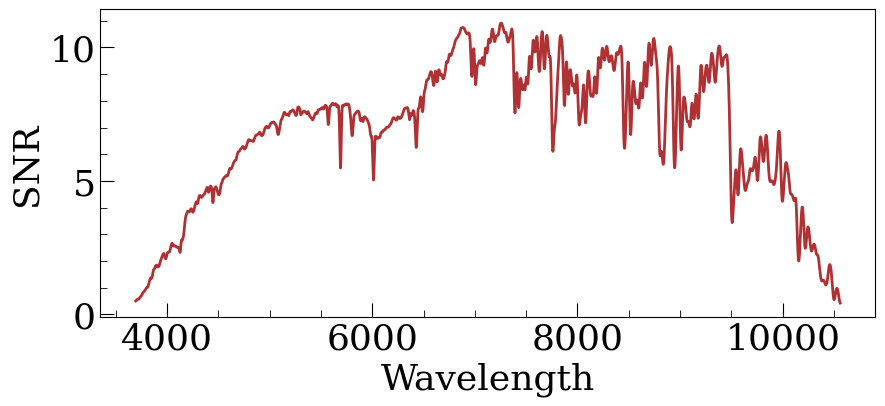

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
ax = fig.gca()

ax.minorticks_on()
ax.tick_params(length=10, which='major', direction="in", labelsize=26)
ax.tick_params(length=5, which='minor', direction="in", labelsize=26)


plt.plot(wave, snr, linewidth=2, color = "#AF3133");
plt.ylabel('SNR', fontsize=26); 
plt.xlabel("Wavelength", fontsize=26);
plt.show()


# Loop through all the files and add the noise

Sim_Cubes/98_754231_h_c.fits
754231
(912, 4, 2)
Sim_Cubes/98_752476_h_c.fits
752476
(912, 43, 41)
Sim_Cubes/98_728246_h_c.fits
728246
(912, 43, 41)
Sim_Cubes/98_683039_h_c.fits
683039
(912, 63, 57)
Sim_Cubes/98_300384_h_c.fits
300384
(912, 63, 57)
Sim_Cubes/98_756797_h_c.fits
756797
(912, 72, 67)
Sim_Cubes/98_418623_h_c.fits
418623
(912, 43, 41)
Sim_Cubes/98_719662_h_c.fits
719662
(912, 63, 57)
Sim_Cubes/98_715476_h_c.fits
715476
(912, 53, 49)
Sim_Cubes/98_198580_h_c.fits
198580
(912, 44, 40)
Sim_Cubes/98_613164_h_c.fits
613164
(912, 43, 41)
Sim_Cubes/98_65350_h_c.fits
65350
(912, 43, 41)
Sim_Cubes/98_65336_h_c.fits
65336
(912, 63, 57)
Sim_Cubes/98_653893_h_c.fits
653893
(912, 53, 49)
Sim_Cubes/98_690382_h_c.fits
690382
(912, 53, 49)
Sim_Cubes/98_734161_h_c.fits
734161
(912, 73, 67)
Sim_Cubes/98_718249_h_c.fits
718249
(912, 43, 41)
Sim_Cubes/98_489584_h_c.fits
489584
(912, 43, 41)
Sim_Cubes/98_58_h_c.fits
58
(912, 43, 41)
Sim_Cubes/98_420536_h_c.fits
420536
(912, 53, 49)
Sim_Cubes/98_2

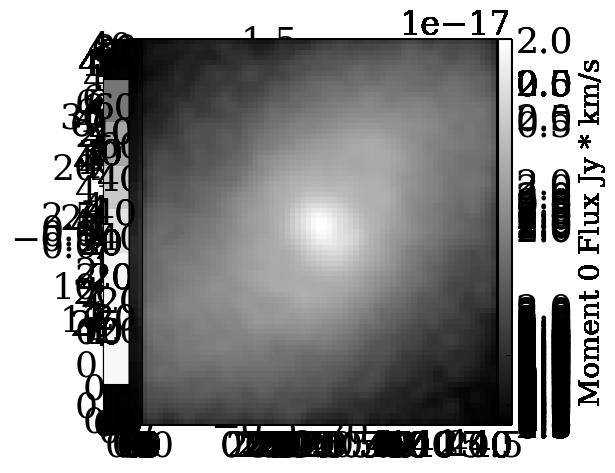

In [42]:
from astropy.convolution import convolve
#So We can resize the matrix for faster computation and lower computational cost when saving the files


folder = Path("Sim_Cubes/")
########################################### Load
snr_file = np.genfromtxt("Calibration files/snr_avarage.dat")

snr_uncrop = snr_file[:,1]

VAC_path = "Vac_Path/iMaNGA_vac.fits"
VAC =  fits.open(VAC_path, mode='denywrite')

example_ID = 734963 # snap 98_734963
snap = 98

galaxy_id_VAC = np.where(VAC[1].data['TNG_snap_id']==str(snap)+"-"+str(example_ID))[0][0] # index of the galaxy in the iMaNGA VAC

redshift = VAC[1].data[galaxy_id_VAC][2] # 0

########################################### Load wavelength info
ver = str("v2.7")
lib = str("th")

hdul = fits.open('Calibration files/MaStar_SSP_'+ver+'.fits')
wave_rest=hdul[2].data[0,:] #lambda array
wave_uncrop= wave_rest*(1+redshift)
hdul.close()
########################################### 


### for creating the effect of the point spread function

#### the point spread function, being added after the noise, make sure to reproduce the covariance among adjacent spacels in the datacube
#### we make use of the SDSS filters to convolve with the effective PSF in the differnt wavelegth band


# get from https://github.com/lonanni/iMaNGA/tree/main/iMaNGA_data/sdss_filters

filer_g = np.genfromtxt('Calibration files/SLOAN_SDSS.g.dat')
wave_g = filer_g[:,0]
response_g = filer_g[:,1]

filer_r = np.genfromtxt('Calibration files/SLOAN_SDSS.r.dat')
wave_r = filer_r[:,0]
response_r = filer_r[:,1]

filer_i = np.genfromtxt('Calibration files/SLOAN_SDSS.i.dat')
wave_i = filer_i[:,0]
response_i = filer_i[:,1]

filer_z = np.genfromtxt('Calibration files/SLOAN_SDSS.z.dat')
wave_z = filer_z[:,0]
response_z = filer_z[:,1]


### We construct an average effective PSF in MaNGA observation (see Nanni+2022)
#### it is available to be used

hdu_psf, headerPSF = fits.getdata("Calibration files/ePSF.fits.gz", header=True)

psfg = hdu_psf[:,:, 0]
psfr = hdu_psf[:,:, 1]
psfi = hdu_psf[:,:, 2]
psfz = hdu_psf[:,:, 3]

########################################### ########################################### 
########################################### Loop through all sim files

for file in folder.glob("*.fits"):

    ########################################
    print(file)
    #ID
    ID = str(file)[13:len(str(file))-9] 
    print(ID)
    Snap = 98
    P  = SpectralCube.read(file)
    ########################################

    
    #reduce size
    Q = P[int(len(P)/2)-int(len(P)/10):int(len(P)/2)+int(len(P)/10)]
    snr = snr_uncrop[int(len(P)/2)-int(len(P)/10):int(len(P)/2)+int(len(P)/10)]
    wave = wave_uncrop[int(len(P)/2)-int(len(P)/10):int(len(P)/2)+int(len(P)/10)]
    #wave_g = wave_g[int(len(P)/2)-int(len(P)/10):int(len(P)/2)+int(len(P)/10)]
    #wave_r = wave_r[int(len(P)/2)-int(len(P)/10):int(len(P)/2)+int(len(P)/10)]
    #wave_z = wave_z[int(len(P)/2)-int(len(P)/10):int(len(P)/2)+int(len(P)/10)]
    #wave_i = wave_i[int(len(P)/2)-int(len(P)/10):int(len(P)/2)+int(len(P)/10)]
    
    del P
    gc.collect()
    #### Now, we can include the noise spaxel per spaxel, as in Eq. 4 in Nanni+2022

    #The cube is already masked, so this is all real data.

    # dont need to find data slices since theyre all data
    # grid_zero = np.zeros(np.shape(Q))
    # grid_zero = np.nanmin(Q.hdu.data,axis=0)>0
    
    #bkg_x = np.where((grid == True)&(grid_zero==True))[0][-1]
    #bkg_y = np.where((grid == True)&(grid_zero==True))[1][-1]
    #bkg_  = FoV_datacube[:, bkg_x, bkg_y]
    
    bkg_  = Q.hdu.data[:, 0, 0]
    
    #rint(np.shape(bkg_))
    #print(np.shape(Q))
    #print(np.shape(np.sqrt(bkg_.reshape(-1,1,1))))
    #print(np.shape(snr.reshape(-1,1,1)))
    
    pflux = np.zeros((Q.shape))
    newnoise = np.zeros((Q.shape))

    
    newnoise[:,:,:] = abs(np.sqrt(Q.hdu.data[:,:,:])* (np.sqrt(bkg_.reshape(-1,1,1))/snr.reshape(-1,1,1)))
    pflux[:,:,:] = np.random.normal(Q.hdu.data[:,:,:], scale = newnoise[:,:,:])
    
    print(np.shape(pflux))
    # to avoid unphysical noise produced by the random process 
    #pflux[np.less(pflux, 0., where=~np.isnan(pflux))] = np.min(pflux[np.greater(pflux, 0., where=~np.isnan(pflux))])
    #newnoise[np.less(newnoise, 0., where=~np.isnan(newnoise))] = np.min(newnoise[np.greater(newnoise, 0., where=~np.isnan(newnoise))])
    
    """
    grid_zero = np.zeros(np.shape(Q))
    grid_zero[grid==True] = np.nanmin(Q.hdu.data[:, (grid==True)],axis=0)>0
    
    bkg_x = np.where((grid == True)&(grid_zero==True))[0][-1]
    bkg_y = np.where((grid == True)&(grid_zero==True))[1][-1]
    bkg_  = FoV_datacube[:, bkg_x, bkg_y]
    
    
    
    pflux = np.zeros((FoV_datacube.shape))
    newnoise = np.zeros((FoV_datacube.shape))
    
    newnoise[:,:,:] = abs(np.sqrt(FoV_datacube[:,:,:])* (np.sqrt(bkg_.reshape(-1,1,1))/snr.reshape(-1,1,1)))
    pflux[:,:,:] = np.random.normal(FoV_datacube[:,:,:], scale = newnoise[:,:,:])
    
    
    # to avoid unphysical noise produced by the random process 
    pflux[np.less(pflux, 0., where=~np.isnan(pflux))] = np.min(pflux[np.greater(pflux, 0., where=~np.isnan(pflux))])
    newnoise[np.less(newnoise, 0., where=~np.isnan(newnoise))] = np.min(newnoise[np.greater(newnoise, 0., where=~np.isnan(newnoise))])
    """


    # For the filter PSF
    """
    ##################################################
    #
    fig, ax = plt.subplots(figsize=(10,4))
    ax = fig.gca()
    ax.minorticks_on()
    ax.tick_params(length=10, which='major', direction="in", labelsize=26)
    ax.tick_params(length=5, which='minor', direction="in", labelsize=26)
    
    xc = int(np.shape(FoV_datacube[0,0,:])[0]/2)
    
    plt.plot(wave, FoV_datacube[:, xc, xc], '-', alpha=.8, color='#010F13', linewidth=1.3, label='synthetic spectrum', zorder=3)
    plt.plot(wave, pflux[:, xc, xc], '-', alpha=0.8, color='#AF3133', linewidth=1.3, label=r'perturbed', zorder=2)
    
    
    
    plt.ylabel(r'$ F_\lambda\quad\left[\,erg/s \,/m^2/\,\AA \,\,\right]$', fontsize=26); 
    plt.xlabel(r'$\lambda [\r{A}]$', fontsize=26) #micron
    plt.legend(fontsize=26)
    plt.grid(ls = '-.', lw = 0.55)
    ax.yaxis.get_offset_text().set_fontsize(24)
    
    
    ##########################################################
    #
    fig, ax = plt.subplots(figsize=(10,4))
    ax = fig.gca()
    ax.minorticks_on()
    ax.tick_params(length=10, which='major', direction="in", labelsize=26)
    ax.tick_params(length=5, which='minor', direction="in", labelsize=26)
    
    xc = int(np.shape(FoV_datacube[0,0,:])[0]/2)
    
    plt.plot(wave, FoV_datacube[:, xc-5, xc+5], '-', alpha=.8, color='#010F13', linewidth=1.3, label='synthetic spectrum', zorder=3)
    plt.plot(wave, pflux[:, xc-5, xc+5], '-', alpha=0.8, color='#AF3133', linewidth=1.3, label=r'perturbed', zorder=2)
    
    
    
    plt.ylabel(r'$ F_\lambda\quad\left[\,erg/s \,/m^2/\,\AA \,\,\right]$', fontsize=26); 
    plt.xlabel(r'$\lambda [\r{A}]$', fontsize=26) #micron
    plt.legend(fontsize=26)
    plt.grid(ls = '-.', lw = 0.55)
    ax.yaxis.get_offset_text().set_fontsize(24)
    
    """

    ##### Now we convolve the datacubes with the effective PSF

    ##### WARNING: it might takes a few minutes

    
    
    pflux_300 = pflux
    grid = np.full(np.shape(pflux),True)#np.where(grid==0, np.nan,grid)
    
    grid_300 = np.full(np.shape(grid),True)#grid[:,~np.isnan(grid).all(1)]
    #grid_300 = grid_300[~np.isnan(grid).all(1)]
    
    im_convoluta = np.zeros((np.shape(pflux_300)))
    #Convolve the random noise with the filter response ratio to create realistic noise
    #print(np.shape(grid_300))
    #print(np.shape(pflux_300))
    #print(np.shape(convolve(pflux_300[k, :,:], np.mean((psfr, psfg), axis=0))))
    #print(np.shape(psfg))
    #print(np.shape(np.where(grid_300[0]==True, convolve(pflux_300[k, :,:], psfg), float("Nan"))))

    for k in range(len(wave)):
        if wave[k]<=wave_r.min():
            im_convoluta[k, :,:] = np.where(grid_300[k]==True, convolve(pflux_300[k, :,:], psfg), float("Nan"))
        if wave_r.min()<wave[k]<=wave_g.max():
            im_convoluta[k, :,:] = np.where(grid_300[k]==True, convolve(pflux_300[k, :,:], np.mean((psfr, psfg), axis=0)), float("Nan"))
        if wave_g.max()<wave[k]<=wave_i.min():
            im_convoluta[k, :,:] = np.where(grid_300[k]==True, convolve(pflux_300[k, :,:], psfr), float("Nan"))
        if wave_i.min()<wave[k]<=wave_r.max():
            im_convoluta[k, :,:] = np.where(grid_300[k]==True, convolve(pflux_300[k, :,:], np.mean((psfr, psfi), axis=0)), float("Nan"))
        if wave_r.max()<wave[k]<=wave_z.min():
            im_convoluta[k, :,:] = np.where(grid_300[k]==True, convolve(pflux_300[k, :,:],psfi), float("Nan"))
        if wave_z.min()<wave[k]<=wave_i.max():
            im_convoluta[k, :,:] = np.where(grid_300[k]==True, convolve(pflux_300[k, :,:],np.mean((psfi, psfz), axis=0)), float("Nan"))
        if wave_i.max()<wave[k]<=wave_z.max():
            im_convoluta[k, :,:] = np.where(grid_300[k]==True, convolve(pflux_300[k, :,:],psfz), float("Nan"))    
        if wave[k]>wave_z.max():
            im_convoluta[k, :,:] = np.where(grid_300[k]==True, convolve(pflux_300[k, :,:],psfz), float("Nan"))    


    #######################
    # make moment map
    #######################

    Q.hdu.data

    NQ = SpectralCube(im_convoluta,header = Q.header,wcs = Q.wcs)    
    moment_0 = NQ.moment(order=0,how='slice')
    
    fig = plt.figure(1, figsize=(6, 5))
    fig.patch.set_facecolor('white')
    ax=plt.subplot(111)
    ax.minorticks_on()
    ax.tick_params(length=8, which='major', direction="in", labelsize=26)
    ax.tick_params(length=3, which='minor', direction="in", labelsize=26)
    
    '''
    im = ax.imshow(im_convoluta[300,:,:].T,cmap='gray'\
                  , zorder=2,interpolation='nearest', origin='lower',\
                   norm=simple_norm(im_convoluta[300,:,:].T, stretch='log', log_a=500))
    '''
    im = ax.imshow(moment_0.hdu.data,cmap='gray'\
                  , zorder=2,interpolation='nearest', origin='lower',\
                   norm=simple_norm(moment_0.hdu.data, stretch='log', log_a=500))
    cbar = plt.colorbar(im,ax=ax, pad = .0050, aspect=30)
    cbar.ax.tick_params(labelsize=26, axis='y', direction='in', )
    
    #cbar.set_ticks([0.5*10**-17, 2*10**-17])
    cbar.set_ticks([0.5*10**-17, 2*10**-17])
    
    
    #cbar.set_label(r'$ F_\lambda\quad\left[\,erg/\,s \,/m^2\,/\,\AA \,\,\right]$',fontsize=20);
    #cbar.set_label("Flux erg/s/m^2/A",fontsize=20);
    cbar.set_label("Moment 0 Flux Jy * km/s",fontsize=20);
    
    cbar.ax.yaxis.get_offset_text().set_fontsize(24)
    #plt.show()

    ### save
    moment_0.write("Moment_Maps/"+str(ID)+"_"+"Moment_0.fits",overwrite=True)
    
    # clean up
    del Q
    del NQ
    del moment_0
    gc.collect()
    